# GAN

## Part One

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../Chapter-7-Convolutional-Neural-Network/MNIST_data/",one_hot=True)

Extracting ../Chapter-7-Convolutional-Neural-Network/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../Chapter-7-Convolutional-Neural-Network/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../Chapter-7-Convolutional-Neural-Network/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../Chapter-7-Convolutional-Neural-Network/MNIST_data/t10k-labels-idx1-ubyte.gz


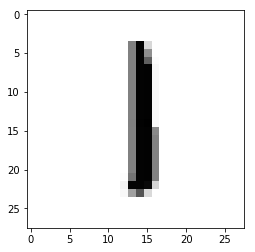

In [4]:
plt.imshow(mnist.train.images[12].reshape(28,28),cmap='Greys')

## Generative Network

In [5]:
def generator(z,reuse=None):
    # z:random noise
    
    with tf.variable_scope('gen',reuse=reuse):
        # variable_scope: choose subsets of parameters
        hidden1 = tf.layers.dense(inputs=z,units=128)
        
        # use leaky relu as activate function
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        
        output = tf.layers.dense(hidden2,units=784,activation=tf.nn.tanh)
        
        return output

## Discriminative Network

In [6]:
def discriminator(X,reuse=None):
    # z:random noise
    
    with tf.variable_scope('dis',reuse=reuse):
        # variable_scope: choose subsets of parameters
        hidden1 = tf.layers.dense(inputs=X,units=128)
        
        # use leaky relu as activate function
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        
        logits = tf.layers.dense(hidden2,units=1) # know real or fake img
        output =tf.sigmoid(logits)
        
        return output,logits

## Part Two

In [7]:
real_images = tf.placeholder(tf.float32,shape=[None,784])
z = tf.placeholder(tf.float32,shape=[None,100]) # 100 random points
G = generator(z)

In [8]:
# real discriminator to train on real images
D_output_real, D_logits_real = discriminator(real_images)

In [9]:
# fake discriminator to train on fake images
D_output_fake, D_logits_fake = discriminator(G,reuse=True)  # we need to reuse the variables

In [10]:
# LOSSES

def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

In [12]:
# Loss trained on real data, all the labels are true, labels has the same shape as logits, 0.9 is a smoothing factor
D_real_loss = loss_func(D_logits_real,tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss_func(D_logits_fake,tf.zeros_like(D_logits_fake))

In [13]:
D_loss = D_real_loss + D_fake_loss

In [14]:
# Loss of generator
G_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

In [15]:
learning_rate = 0.001

In [16]:
# Two Optimizer : One for generator, One for discriminator
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [17]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss,var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss,var_list=g_vars)

In [18]:
d_vars

[<tf.Variable 'dis/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'dis/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dis/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'dis/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dis/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'dis/dense_2/bias:0' shape=(1,) dtype=float32_ref>]

## Part Three

In [19]:
batch_size = 100

In [20]:
epochs = 30

In [21]:
init = tf.global_variables_initializer()

In [22]:
samples = []

In [25]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for i in range(num_batches):
            
            batch = mnist.train.next_batch(batch_size)
            
            batch_images = batch[0].reshape((batch_size,784)) # 0 is feature 1 is number label
            batch_images = batch_images * 2 - 1 # make sense for tanh
            
            batch_z = np.random.uniform(-1,1,size = (batch_size,100))
            
            # not interested in the model but the generated images
            _ = sess.run(D_trainer,feed_dict={real_images:batch_images,z:batch_z})
            _ = sess.run(G_trainer,feed_dict={z:batch_z})
            
        print("ON EPOCH {}".format(epoch))
        
        # generate one sample from generator
        # initilization
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        samples.append(gen_sample)
            
            
            

ON EPOCH 0
ON EPOCH 1
ON EPOCH 2
ON EPOCH 3
ON EPOCH 4
ON EPOCH 5
ON EPOCH 6
ON EPOCH 7
ON EPOCH 8
ON EPOCH 9
ON EPOCH 10
ON EPOCH 11
ON EPOCH 12
ON EPOCH 13
ON EPOCH 14
ON EPOCH 15
ON EPOCH 16
ON EPOCH 17
ON EPOCH 18
ON EPOCH 19
ON EPOCH 20
ON EPOCH 21
ON EPOCH 22
ON EPOCH 23
ON EPOCH 24
ON EPOCH 25
ON EPOCH 26
ON EPOCH 27
ON EPOCH 28
ON EPOCH 29


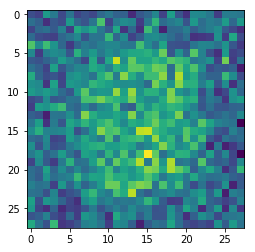

In [27]:
plt.imshow(samples[0].reshape(28,28))

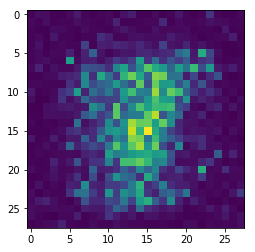

In [28]:
plt.imshow(samples[10].reshape(28,28))

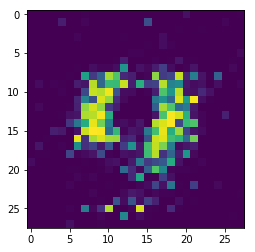

In [29]:
plt.imshow(samples[20].reshape(28,28))

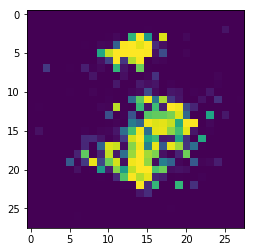

In [30]:
plt.imshow(samples[29].reshape(28,28))

In [31]:
saver = tf.train.Saver(var_list=g_vars)

In [32]:
new_samples = []
with tf.Session() as sess:
    
    saver.restore(sess,'./models/500_epoch_model.ckpt')
    for x in range(5):
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        new_samples.append(gen_sample)

INFO:tensorflow:Restoring parameters from ./models/500_epoch_model.ckpt


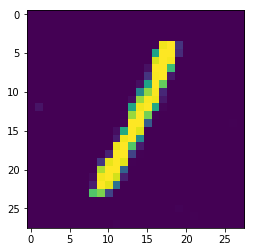

In [33]:
plt.imshow(new_samples[0].reshape(28,28))

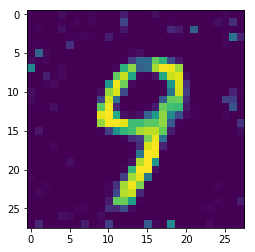

In [34]:
plt.imshow(new_samples[1].reshape(28,28))

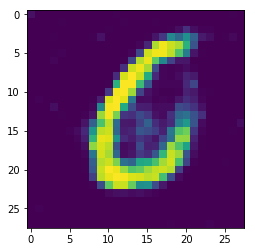

In [35]:
plt.imshow(new_samples[2].reshape(28,28))

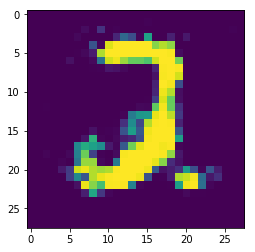

In [36]:
plt.imshow(new_samples[3].reshape(28,28))

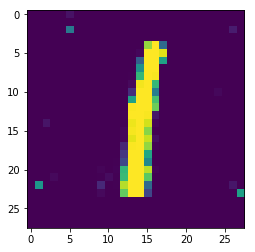

In [37]:
plt.imshow(new_samples[4].reshape(28,28))